In [1]:
import numpy as np

### 損失関数
1. 二乗和誤差
2. 交差エントロピー

In [2]:
# 二乗和誤差
def sum_squared_error(y: np.ndarray, t: np.ndarray):
	return 0.5 * np.sum((y - t)**2)

In [3]:
# 「2」を正解とする
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

# 例 1:「2」の確率が最も高い場合(0.6)
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])

sum_squared_error(y, t)

0.09750000000000003

In [4]:
# 例 2:「7」の確率が最も高い場合(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

sum_squared_error(y, t)

0.5975

In [5]:
# 交差エントロピー誤差
def cross_entropy_error(y: np.ndarray, t: np.ndarray):
	delta = 1e-7
	return -np.sum(t*np.log(y+delta))

In [6]:
# 正解ラベルが2で出力が2の場合
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])

cross_entropy_error(y=y, t=t)

0.510825457099338

In [7]:
# 正解ラベルが2で出力が7の場合
y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])
cross_entropy_error(y=y, t=t)

2.302584092994546

### ミニバッチ学習

In [8]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
	load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [9]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [10]:
x_batch[0].size

784

In [11]:
t_batch[0].ndim

1

In [12]:
# t -> one-hot 表現の場合
def cross_entropy_error(y, t):
	if y.ndim == 1:
		t = t.reshape(1, t.size)
		y = y.reshape(1, y.size)

	batch_size = y.shape[0]
	return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [13]:
# t -> one-hot 表現じゃない場合
# def cross_entropy_error(y, t):
# 	if y.ndim == 1:
# 		t = t.reshape(1, t.size)
# 		y = y.reshape(1, y.size)

# 	batch_size = y.shape[0]
# 	return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [14]:
# 活性化関数

# シグモイド関数
def sigmoid(x):
	return 1/(1+np.exp(-x))

# ステップ関数
def step_function(x):
	return np.array(x>0, dtype=np.int)

# ReLU関数
def relu(x):
	return np.maximum(0, x)


# 出力層の活性化関数
# 恒等関数 -> 回帰問題

# ソフトマックス関数
def softmax(a):
	c = np.max(a)
	exp_a = np.exp(a - c) # オーバーフロー対策
	sum_exp_a = np.sum(exp_a)
	y = exp_a/sum_exp_a
	return y

In [15]:
def get_data():
	(x_train, t_train), (x_test, t_test) = \
		load_mnist(normalize=True, flatten=True, one_hot_label=True)
	return x_test, t_test

import pickle
def init_network():
	with open('sample_weight.pkl', 'rb') as f:
		network = pickle.load(f)
	return network

def predict(network, x):
	W1, W2, W3 = network['W1'], network['W2'], network['W3']
	b1, b2, b3 = network['b1'], network['b2'], network['b3']

	a1 = np.dot(x, W1) + b1
	z1 = sigmoid(a1)
	a2 = np.dot(z1, W2) + b2
	z2 = sigmoid(a2)
	a3 = np.dot(z2, W3) + b3
	y = softmax(a3)

	return y

In [16]:
# Numerical differentiation(数値微分)
def numerical_diff(f, x):
	h = 1e-4 # 0.0001
	return (f(x+h) - f(x-h))/(2*h)

In [17]:
# 数値微分の例

def function_1(x):
	return 0.01*(x**2) + 0.1*x

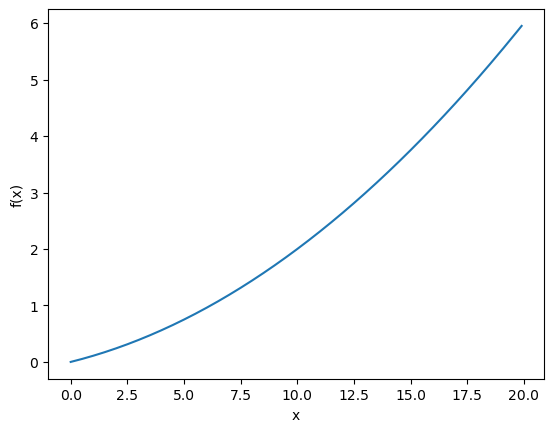

In [18]:
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [19]:
# 数値微分@x=5
numerical_diff(function_1, 5)

0.1999999999990898

In [20]:
# 解析微分@x=5
0.02*5 + 0.1

0.2

In [21]:
# 数値微分@x=10
numerical_diff(function_1, 10)

0.2999999999986347

In [22]:
# 解析微分@x=10
0.02*10 + 0.1

0.30000000000000004

In [23]:
# y = ax + b
x1 = 5
y1 = function_1(x1)
# y = ax + b
a1 = 0.02*5 + 0.1
b1 = y1 - (a1*x1)

def tangent_1(x):
	y = 0.2*x - 0.25
	return y

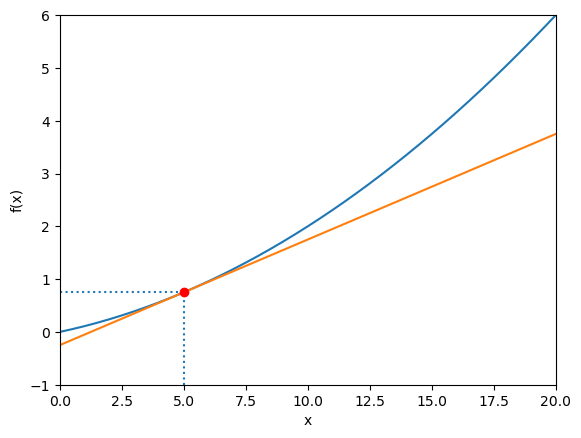

In [24]:
x = np.arange(0.0, 20.1, 0.1)
y = function_1(x)
y1 = tangent_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.plot(x, y1)
plt.vlines(x=5, ymin=-1, ymax=function_1(5), linestyles='dotted')
plt.hlines(y=function_1(5), xmin=0, xmax=5, linestyles='dotted')
plt.plot(5, function_1(5), 'ro')
plt.xlim(0, 20)
plt.ylim(-1, 6)
plt.show()

In [25]:
# y = ax + b
x2 = 10
y2 = function_1(x2)
# y = ax + b
a2 = 0.02*x2 + 0.1
b2 = y2 - (a2*x2)

print(a2)
print(b2)

0.30000000000000004
-1.0000000000000004


In [26]:
def tangent_2(x):
	y = 0.3*x - 1
	return y

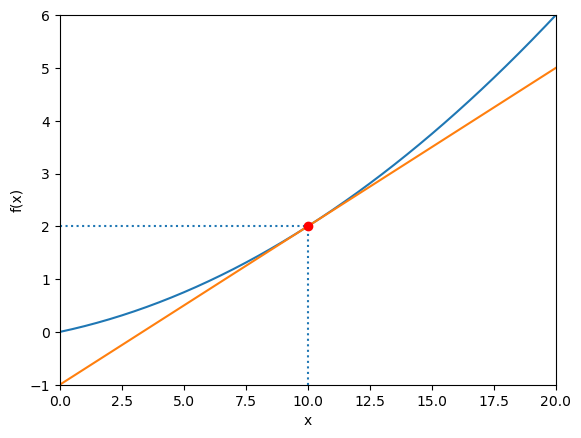

In [27]:
x = np.arange(0.0, 20.1, 0.1)
y = function_1(x)
y2 = tangent_2(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.plot(x, y2)
plt.vlines(x=10, ymin=-1, ymax=function_1(10), linestyles='dotted')
plt.hlines(y=function_1(10), xmin=0, xmax=10, linestyles='dotted')
plt.plot(10, function_1(10), 'ro')
plt.xlim(0, 20)
plt.ylim(-1, 6)
plt.show()

### 偏微分

In [28]:
def function_2(x):
	return np.sum(x**2)
	# return x[0]**2 + x[1]**2

In [29]:
def function_tmp1(x0):
	return x0**2 + 4**2

numerical_diff(function_tmp1, 3)

6.00000000000378

In [30]:
def function_tmp2(x1):
	return 3**2 + x1**2

numerical_diff(function_tmp2, 4)

7.999999999999119

In [31]:
# 勾配(gradient)
def numerical_gradient(f, x):
	h = 1e-4 # 0.0001
	grad = np.zeros_like(x)

	for idx in range(x.size):
		tmp_val = x[idx]

		# f(x+h)の計算
		x[idx] = tmp_val + h
		fxh1 = f(x)

		# f(x-h)の計算
		x[idx] = tmp_val - h
		fxh2 = f(x)

		grad[idx] = (fxh1 - fxh2)/(2*h)

		# 値を元に戻す
		x[idx] = tmp_val

	return grad

In [32]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [33]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [34]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

In [35]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
	x = init_x

	for i in range(step_num):
		grad = numerical_gradient(f, x)
		x -= lr * grad

	return x

In [36]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [37]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [38]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

In [39]:
import sys, os
sys.path.append(os.pardir)
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
	def __init__(self):
		self.W = np.random.randn(2, 3) # ガウス分布で初期

	def predict(self, x):
		return np.dot(x, self.W)

	def loss(self, x, t):
		z = self.predict(x)
		y = softmax(z)
		loss = cross_entropy_error(y, t)

		return loss

In [40]:
net = simpleNet()
print(net.W) # 重みパラメータ

[[-1.59105265  0.65495886  0.09654052]
 [ 0.41208852  0.63474796 -0.88045503]]


In [41]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-0.58375192  0.96424848 -0.73448522]


In [42]:
np.argmax(p) # 最大値のインデックス

1

In [43]:
t = np.array([0, 0, 1]) #正解ラベル
net.loss(x, t)

2.0320486341394988

In [44]:
def f(W):
	return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.09143358  0.42992604 -0.52135962]
 [ 0.13715037  0.64488906 -0.78203943]]


In [45]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:

	def __init__(self, input_size, hidden_size, output_size,\
							weight_init_std=0.01):
		# 重みの初期化
		self.params = {}
		self.params['W1'] = weight_init_std * \
							np.random.randn(input_size, hidden_size)
		self.params['W2'] = weight_init_std * \
							np.random.randn(hidden_size, output_size)
		self.params['b1'] = weight_init_std * \
							np.random.randn(hidden_size)
		self.params['b2'] = weight_init_std * \
							np.random.randn(output_size)

	def predict(self, x):
		W1, W2 = self.params['W1'], self.params['W2']
		b1, b2 = self.params['b1'], self.params['b2']

		a1 = np.dot(x, W1)
		z1 = sigmoid(a1)
		a2 = np.dot(z1, W2)
		y = softmax(a2)

		return y

	# x:入力データ, t:教師データ
	def loss(self, x, t):
		y = self.predict(x)

		return cross_entropy_error(y, t)

	def accuracy(self, x, t):
		y = self.predict(x)
		y = np.argmax(y, axis=1)
		t = np.argmax(t, axis=1)

		accuracy = np.sum(y == t) / float(x.shape[0])
		return accuracy

	# x:入力データ, t:教師データ
	def numerical_gradient(self, x, t):
		loss_W = lambda W: self.loss(x, t)

		grad = {}
		grad['W1'] = numerical_gradient(loss_W, self.params['W1'])
		grad['W2'] = numerical_gradient(loss_W, self.params['W2'])
		grad['b1'] = numerical_gradient(loss_W, self.params['b1'])
		grad['b2'] = numerical_gradient(loss_W, self.params['b2'])

		return grad

In [46]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['W2'].shape)
print(net.params['b1'].shape)
print(net.params['b2'].shape)

(784, 100)
(100, 10)
(100,)
(10,)


In [47]:
x = np.random.randn(100, 784) # ダミーの入力データ(100枚分)
y = net.predict(x)
print(np.argmax(y, axis=1))

[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]


In [48]:
x = np.random.randn(100, 784) # ダミーの入力データ(100枚分)
t = np.random.randn(100, 10) # ダミーの入力データ(100枚分)

grad = net.numerical_gradient(x, t)

print(grad['W1'].shape)
print(grad['b1'].shape)
print(grad['W2'].shape)
print(grad['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


### ミニバッチ学習の実装

In [49]:
from dataset.mnist import load_mnist
from common.two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = \
	load_mnist(normalize=True, flatten=True, one_hot_label=True)

train_loss_list = []

# ハイパーパラメータ
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
	# ミニバッチの取得
	batch_mask = np.random.choice(train_size, batch_size)
	x_batch = x_train[batch_mask]
	t_batch = t_train[batch_mask]

	# 勾配の算出
	# grad = network.numerical_gradient(x_batch, t_batch)
	grad = network.gradient(x_batch, t_batch) # 高速版

	# パラメータの更新
	for key in ('W1', 'b1', 'W2', 'b2'):
		network.params[key] -= learning_rate * grad[key]

	# 学習経過の記録
	loss = network.loss(x_batch, t_batch)
	train_loss_list.append(loss)

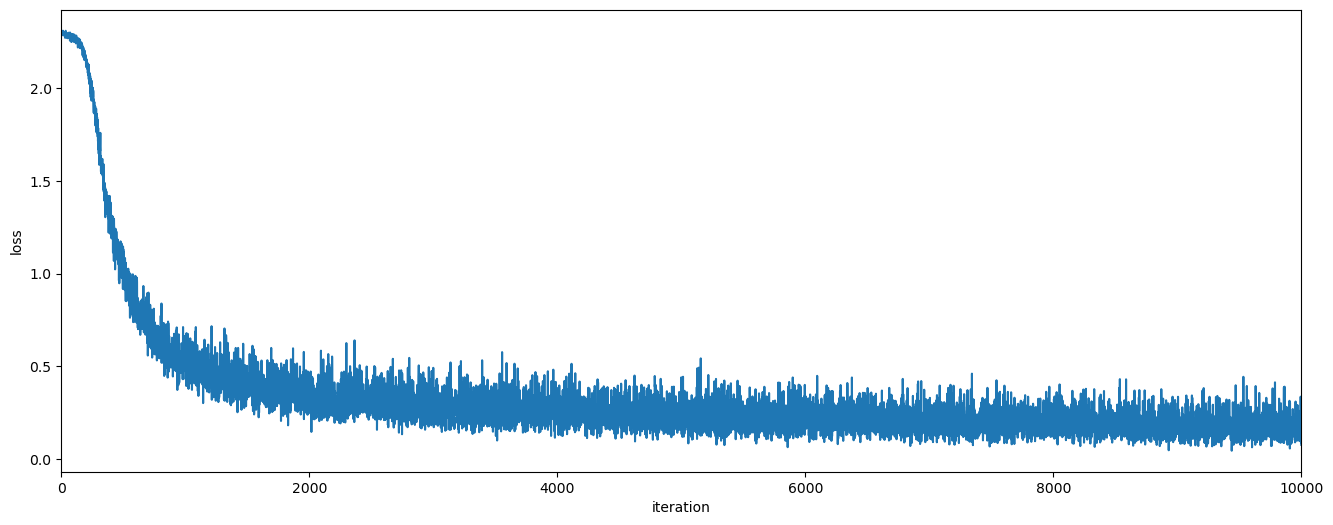

In [59]:
plt.figure(figsize=(16, 6))
plt.plot(train_loss_list)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.xlim(0, 10000)
plt.show()

In [64]:
import numpy as np
from dataset.mnist import load_mnist
from common.two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = \
	load_mnist(normalize=True, flatten=True, one_hot_label=True)
train_size = x_train.shape[0]

# ハイパーパラメータ
iters_num = 10000
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []

# 1エポックあたりの繰り返し数
iter_per_epoch = max(train_size/batch_size, 1)
epoch_cnt = 0

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
	# ミニバッチの取得
	batch_mask = np.random.choice(train_size, batch_size)
	x_batch = x_train[batch_mask]
	t_batch = t_train[batch_mask]

	# 勾配の算出
	grad = network.gradient(x_batch, t_batch)

	# パラメタの更新
	for key in ('W1', 'b1', 'W2', 'b2'):
		network.params[key] -= learning_rate * grad[key]

	if i % iter_per_epoch == 0:
		train_loss = network.loss(x_batch, t_batch)
		train_loss_list.append(train_loss)
		train_acc = network.accuracy(x_batch, t_batch)
		train_acc_list.append(train_acc)
		test_loss = network.loss(x_test, t_test)
		test_loss_list.append(test_loss)
		test_acc = network.accuracy(x_test, t_test)
		test_acc_list.append(test_acc)

		print(f'Epoch:{epoch_cnt} | {train_loss=:.5f} | {train_acc=:.4f} | {test_loss=:.5f} | {test_acc=:.4f}')
		epoch_cnt += 1

Epoch:0 | train_loss=2.29249 | train_acc=0.1400 | test_loss=2.30239 | test_acc=0.0980
Epoch:1 | train_loss=0.95697 | train_acc=0.7700 | test_loss=0.83600 | test_acc=0.7966
Epoch:2 | train_loss=0.35310 | train_acc=0.9100 | test_loss=0.45977 | test_acc=0.8812
Epoch:3 | train_loss=0.43768 | train_acc=0.8800 | test_loss=0.36273 | test_acc=0.9018
Epoch:4 | train_loss=0.25490 | train_acc=0.9300 | test_loss=0.31957 | test_acc=0.9091
Epoch:5 | train_loss=0.30828 | train_acc=0.9300 | test_loss=0.29257 | test_acc=0.9160
Epoch:6 | train_loss=0.22213 | train_acc=0.9600 | test_loss=0.27372 | test_acc=0.9209
Epoch:7 | train_loss=0.30115 | train_acc=0.9200 | test_loss=0.25925 | test_acc=0.9271
Epoch:8 | train_loss=0.21786 | train_acc=0.9500 | test_loss=0.24643 | test_acc=0.9296
Epoch:9 | train_loss=0.22245 | train_acc=0.9100 | test_loss=0.23601 | test_acc=0.9306
Epoch:10 | train_loss=0.16784 | train_acc=0.9500 | test_loss=0.22680 | test_acc=0.9350
Epoch:11 | train_loss=0.17238 | train_acc=0.9600 | te

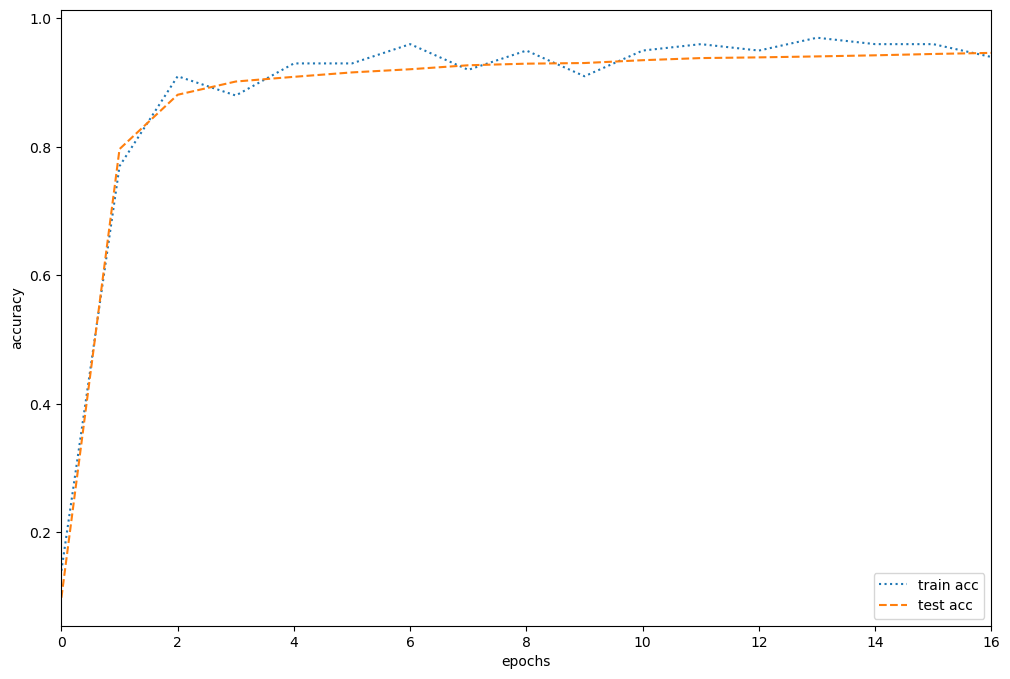

In [85]:
# plt.plot(train_loss_list)
# plt.plot(test_loss_list)
plt.figure(figsize=(12, 8))
plt.plot(train_acc_list, linestyle='dotted', label='train acc')
plt.plot(test_acc_list, linestyle='dashed', label='test acc')
plt.xlim(0, 16)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc = 'lower right');